In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [102]:
n = 20 #Quantité de données
p = 2 #Dimension des données
k = 3 #Nombre de cluster
X = np.random.random((n , p)) #Génération d'un jeu de données aléatoire

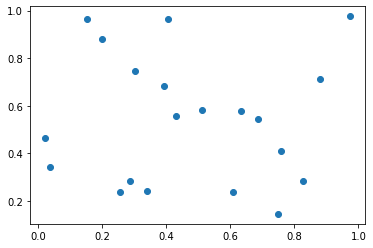

In [103]:
plt.scatter(X[: , 0], X[: , 1]) #Visualisation des données

In [104]:
centers = X[np.random.choice(n, k, replace = False)] #Choix de trois points aléatoires de référence

In [107]:
((X.reshape(n, 1, p) - centers.reshape(1, k, p))**2).sum(axis = 2)**0.5 #Calcule de la distance entre chaque données et les points de référence

array([[0.        , 0.76832658, 0.53597053],
       [0.57749037, 0.26536351, 0.24130033],
       [0.53597053, 0.25217824, 0.        ],
       [0.91802819, 0.63395299, 0.72203424],
       [0.73052683, 0.69682373, 0.69198956],
       [0.25523039, 0.68013646, 0.50566707],
       [0.71434986, 0.74761023, 0.72491515],
       [0.48750617, 0.37038236, 0.28184483],
       [0.42929185, 0.95696577, 0.79833071],
       [0.77982324, 0.73410112, 0.73955512],
       [0.76832658, 0.        , 0.25217824],
       [0.57916704, 1.0139186 , 0.88719749],
       [0.2816306 , 0.81857597, 0.56648318],
       [0.4740243 , 0.49499001, 0.40883435],
       [0.38917719, 0.52499924, 0.39638764],
       [0.54447916, 0.85756169, 0.75283958],
       [0.3248723 , 0.82153162, 0.65676613],
       [0.27937185, 0.61654855, 0.44763739],
       [0.89050139, 0.51798165, 0.62910741],
       [0.70140215, 0.09497999, 0.22308563]])

In [108]:
#Autre méthode de calcule de la distance
distances = np.zeros((n, k))
for i in range(k):
  distances[:,i] = (((X - centers[i])**2).sum(axis = 1))**0.5
distances

array([[0.        , 0.76832658, 0.53597053],
       [0.57749037, 0.26536351, 0.24130033],
       [0.53597053, 0.25217824, 0.        ],
       [0.91802819, 0.63395299, 0.72203424],
       [0.73052683, 0.69682373, 0.69198956],
       [0.25523039, 0.68013646, 0.50566707],
       [0.71434986, 0.74761023, 0.72491515],
       [0.48750617, 0.37038236, 0.28184483],
       [0.42929185, 0.95696577, 0.79833071],
       [0.77982324, 0.73410112, 0.73955512],
       [0.76832658, 0.        , 0.25217824],
       [0.57916704, 1.0139186 , 0.88719749],
       [0.2816306 , 0.81857597, 0.56648318],
       [0.4740243 , 0.49499001, 0.40883435],
       [0.38917719, 0.52499924, 0.39638764],
       [0.54447916, 0.85756169, 0.75283958],
       [0.3248723 , 0.82153162, 0.65676613],
       [0.27937185, 0.61654855, 0.44763739],
       [0.89050139, 0.51798165, 0.62910741],
       [0.70140215, 0.09497999, 0.22308563]])

In [154]:
distances = cdist(X, centers) #Récupération de la distance entre les coordonnées des donnérd et celles des points de référence avec la méthode cdist
plus_proche = np.argmin(distances, axis = 1) #Lister les points de référence les plus proches pour chaque donnée

In [155]:
X[plus_proche == 0].mean(axis = 0) #Faire la moyenne des coordonnées des points les plus proches du 1er cluster

array([0.92585373, 0.84343259])

In [116]:
#Faire la moyenne des coordonnées pour les 3 clusters
for i in range(k):
  centers[i, :] = X[plus_proche == i].mean(axis = 0)

In [145]:
centers = X[np.random.choice(n, k, replace = False)] #Choix de trois points aléatoires de référence
plus_proche = np.zeros(n).astype(int) #Créer une liste de 0 de la taille de notre jeu de données

while True: 
  ancienne_plus_proche = plus_proche.copy() #Stocker la valeur de notre précédente liste pour la comparer avec la nouvelle qui sera générée en sortie
  print(plus_proche)
  distances = cdist(X, centers) #Récupération de la distance entre les coordonnées des donnérd et celles des points de référence avec la méthode cdist
  plus_proche = np.argmin(distances, axis = 1) #Lister les points de référence les plus proches pour chaque donnée

  for i in range(k): #Pour chaque point de référence
    centers[i, :] = X[plus_proche == i].mean(axis = 0) #Changer ses coordonnées à celles de la moyenne des coordonnées des données les plus proches
  
  if all(plus_proche == ancienne_plus_proche): #Si les coordonnées de la nouvelle liste est identique à celle de la précédente itération, quitter la boucle
    break

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 1 1 0 0 2 0 1 2 0 1 0 2 1 2 0 2 2 0 1]
[2 1 1 0 0 2 0 1 2 0 1 2 2 1 2 0 2 2 0 1]
[2 1 1 0 0 2 0 1 2 0 1 2 2 1 2 2 2 2 0 1]


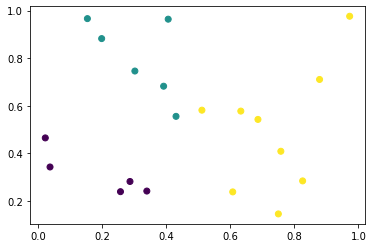

In [146]:
plt.scatter(X[:, 0], X[:, 1], c = plus_proche) #Visualiser les résultats

In [156]:
#Application du clustering K-means sous forme de fonction
def Kmeans(X, k):
  n = X.shape[0]
  centers = X[np.random.choice(n, k, replace = False)]
  plus_proche = np.zeros(n).astype(int)

  while True:
    ancienne_plus_proche = plus_proche.copy()
    distances = cdist(X, centers)
    plus_proche = np.argmin(distances, axis = 1)

    for i in range(k):
      centers[i, :] = X[plus_proche == i].mean(axis = 0)
    
    if all(plus_proche == ancienne_plus_proche):
      break

  plt.scatter(X[:, 0], X[:, 1], c = plus_proche)
  return(plus_proche, centers)

[2 1 1 3 3 0 3 1 0 3 1 0 2 1 1 0 0 0 3 1]
[[0.71033571 0.36647412]
 [0.34241322 0.76832026]
 [0.92585373 0.84343259]
 [0.18902374 0.31438369]]


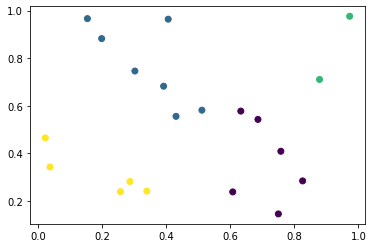

In [157]:
#Test de la fonction
labels, centers = Kmeans(X, 4)
print(labels)
print(centers)